In [5]:
import pandas as pd
import pickle
from sklearn.cluster import KMeans
df = pd.read_excel('lyrics.xlsx', sheet_name='muse_v3')
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
vad_dict = {}

with open('./lyrics-updated.pkl', 'rb') as f:
    lyrics = pickle.load(f)

for index, row in df.iterrows():
    song_name = row['track']

    if song_name in lyrics:
        vad_dict[song_name] = [row['valence_tags'], row['arousal_tags'], row['dominance_tags']]



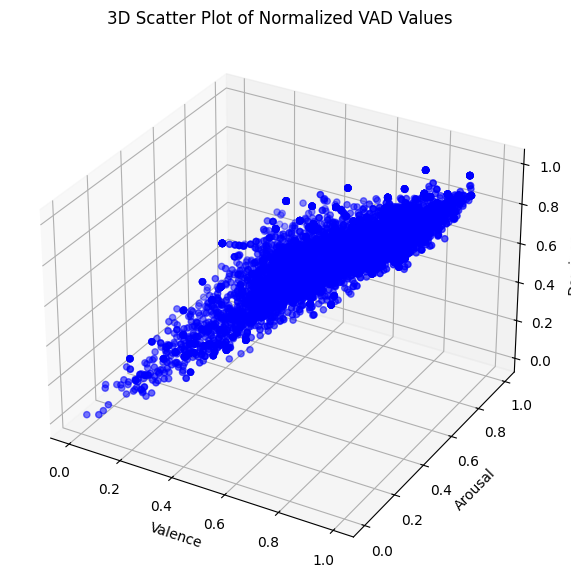

In [10]:
df = pd.DataFrame.from_dict(vad_dict, orient='index')
df.columns = ["valence", "arousal", "dominance"]
scaler = MinMaxScaler()
normalized_vad = scaler.fit_transform(df)
df_normalized = pd.DataFrame(normalized_vad, columns=["valence", "arousal", "dominance"], index=df.index)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_normalized['valence'], df_normalized['arousal'], df_normalized['dominance'], c='b', marker='o')

ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
plt.title("3D Scatter Plot of Normalized VAD Values")

# Show plot
plt.show()

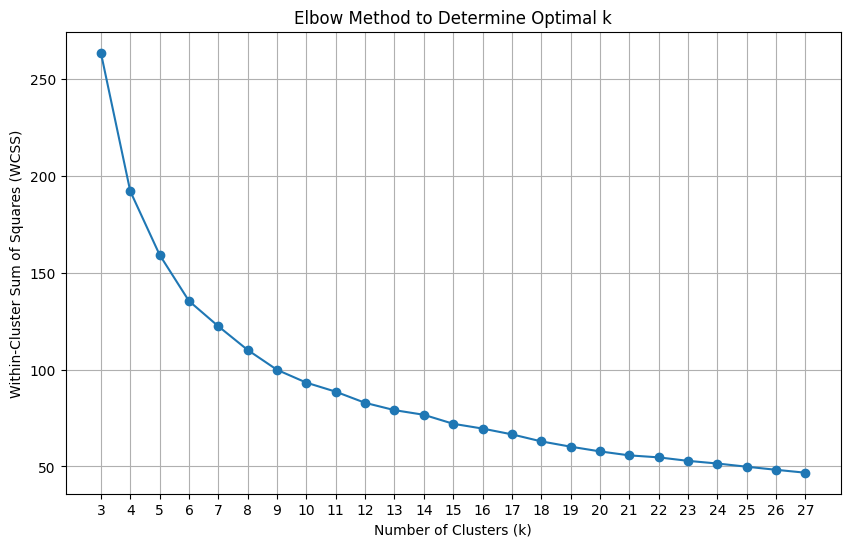

In [11]:
# Calculate WCSS for a range of k values from 3 to 27
wcss = []
k_range = range(3, 28)  # from 3 to 27

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS for k-means

# Plot WCSS to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method to Determine Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [12]:
kmeans = KMeans(n_clusters=27, random_state=42)
labels = kmeans.fit_predict(df_normalized)

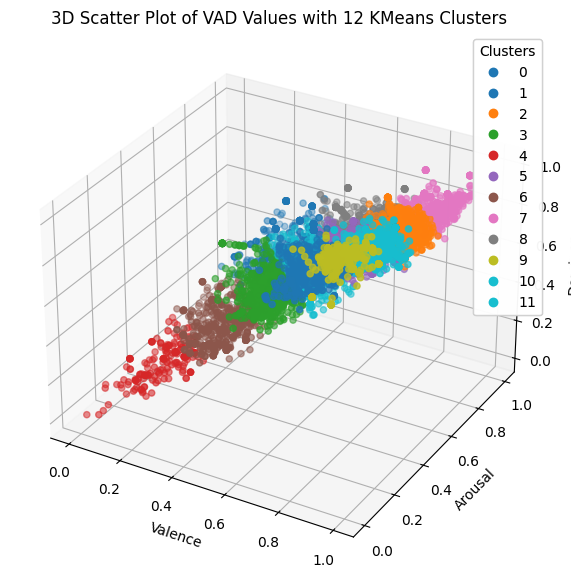

In [13]:
df_normalized['cluster'] = labels

# Plot the 3D scatter plot with different colors for each cluster
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use a colormap to assign a color to each cluster
scatter = ax.scatter(df_normalized['valence'], df_normalized['arousal'], df_normalized['dominance'], 
                     c=df_normalized['cluster'], cmap='tab10', marker='o')

# Add legend for clusters
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

# Label the axes
ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
plt.title("3D Scatter Plot of VAD Values with 12 KMeans Clusters")

# Show plot
plt.show()

In [15]:
df['cluster'] = labels
df.groupby('cluster').mean(numeric_only=True)

,valence,arousal,dominance
cluster,,,
0,5.667872,3.402534,5.666847
1,3.522018,5.321097,4.449623
2,7.150913,5.025476,6.307043
3,4.216373,3.345209,4.398261
4,2.001026,1.856168,2.088336
5,6.188912,4.510534,5.553891
6,3.207112,2.748008,3.278803
7,7.553820,5.912532,6.574362
8,5.605548,5.759032,5.601704
